In [1]:
include("simulation.jl")

plotsim (generic function with 1 method)

In [10]:
herds, preds = initSim(50, 100; herdmean=5, predcool=16/24)

(Herd[Herd(5, [-3.9425406468779833, 2.0429348378209875], 3.0, 6.120173040241033, 0.041666666666666664, -1.0), Herd(5, [-3.600321638459565, -1.9896481133714037], 3.0, 3.92684848435546, 0.041666666666666664, -1.0), Herd(5, [-4.389433295886328, -4.6451992931929595], 3.0, 1.3110464860141078, 0.041666666666666664, -1.0), Herd(5, [3.2140023688438752, 4.93007005065807], 3.0, 2.249123863952983, 0.041666666666666664, -1.0), Herd(5, [1.0100473094379598, -1.855721975686909], 3.0, 0.8331516026186921, 0.041666666666666664, -1.0), Herd(5, [3.628831590608195, -0.4063223751676217], 3.0, 2.6365911113503167, 0.041666666666666664, -1.0), Herd(5, [-1.9213837542450007, -4.433694046887723], 3.0, 3.024992909742484, 0.041666666666666664, -1.0), Herd(5, [1.0858468752900503, 4.949591122097489], 3.0, 2.9312556982802622, 0.041666666666666664, -1.0), Herd(5, [-3.5611873511564616, -1.6836692123443884], 3.0, 2.585589126721564, 0.041666666666666664, -1.0), Herd(5, [-0.16716314602566396, -3.2338789906643273], 3.0, 0.1

┌ Info: Saved animation to C:\Users\Erik\AppData\Local\Temp\jl_YzotUVCNIz.gif
└ @ Plots C:\Users\Erik\.julia\packages\Plots\QWCV6\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Erik\\AppData\\Local\\Temp\\jl_YzotUVCNIz.gif")
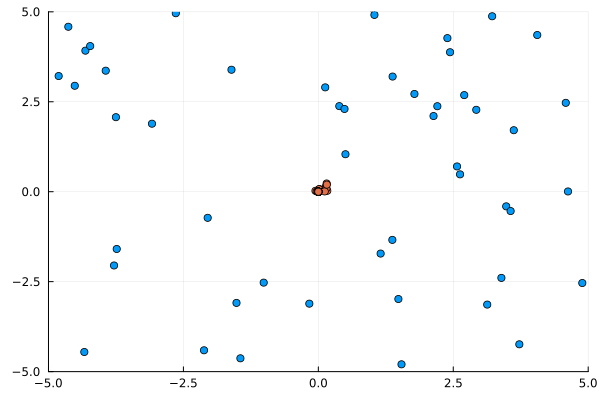

In [11]:
skip = 24*60/15
days = 20
tpops = [population(herds)]
@gif for i in 1:(days*24*60/skip) 
    global herds, preds, tpops
    for _ in 1:skip
        herds = removeempty(moveherd.(herds, Ref(preds)))
        if length(herds) == 0
            break
        end
        preds = movepredator.(preds, Ref(herds), Ref(preds); comm = true)
    end
    if length(herds) == 0
        break
    end
    append!(tpops, population(herds))
    herds = herds[getfield.(herds,:count) .>= 0]
    plotsim(herds, preds)
end

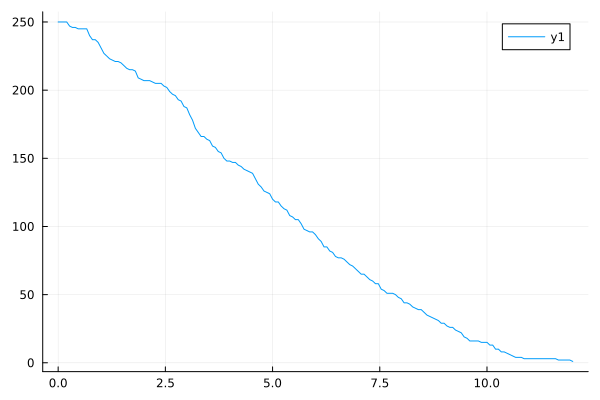

In [12]:
#range(0,length(tpops)*skip/60/24,length(tpops))
x = (0:length(tpops)-1) * skip/60/24
plot(x, tpops)

In [5]:
N = 10
total = 100
herdsize = 100
#sum([sim(floor(total/herdsize), 10; herdmean=herdsize, predcool=16/24, comm=true) for _ in 1:N])/N

100

In [6]:
#sum([sim(floor(total/herdsize), 10; herdmean=herdsize, predcool=16/24, comm=false) for _ in 1:N])/N